# Explore here

In [16]:
import pandas as pd

# Ruta local del archivo CSV descargado
archivo_csv = "/Users/luiseduardogarciablanco/Desktop/bootcamp/machin learning regression/regresion lineal clase 5:7/machine-learning-reglineal/src/medical_insurance_cost.csv"  

# Crear el DataFrame desde el archivo CSV
df = pd.read_csv(archivo_csv)

# Visualizar las primeras filas del DataFrame para verificar los datos
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


age.  = Edad del beneficiario principal (numérico)
sex.  = Género del beneficiario principal (categórico)
bmi. = índice de masa corporal (numérico)
children.  = Número de niños/dependientes cubiertos por un seguro médico (numérico)
smoker.= ¿Es fumador? (categórico)
region. =  Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
charges. = Prima del seguro médico (numérico)

In [17]:
#importamos librerias
df.info


<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [18]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [19]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

1


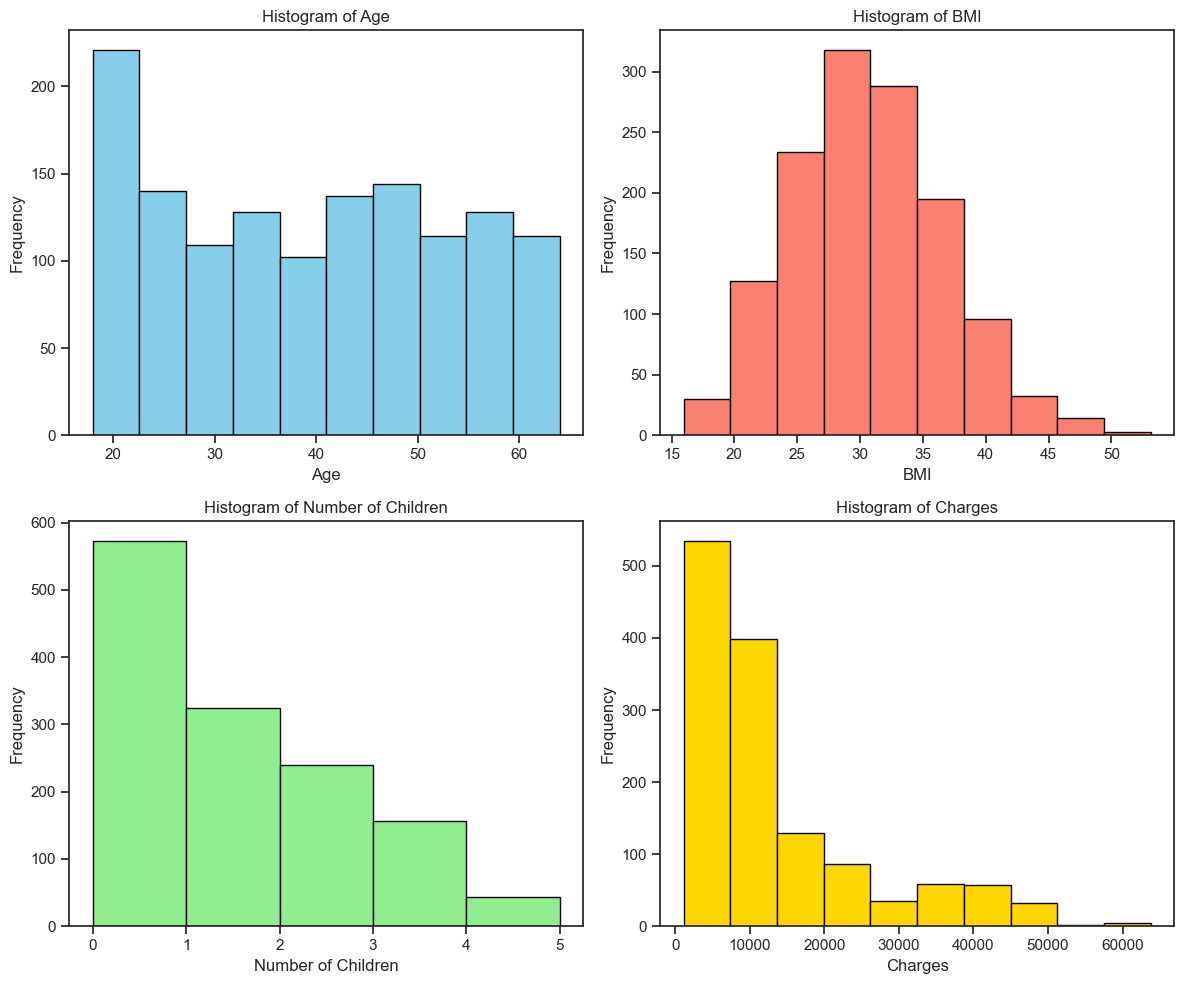

In [20]:
import pandas as pd
import matplotlib.pyplot as plt



# Crear un subplot de 2x2 para los histogramas
plt.figure(figsize=(12, 10))

# Histograma de 'age'
plt.subplot(2, 2, 1)
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Histograma de 'bmi'
plt.subplot(2, 2, 2)
plt.hist(df['bmi'], bins=10, color='salmon', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')

# Histograma de 'children'
plt.subplot(2, 2, 3)
plt.hist(df['children'], bins=5, color='lightgreen', edgecolor='black')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Children')

# Histograma de 'charges'
plt.subplot(2, 2, 4)
plt.hist(df['charges'], bins=10, color='gold', edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Charges')

# Ajustar el espacio entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el subplot
plt.show()

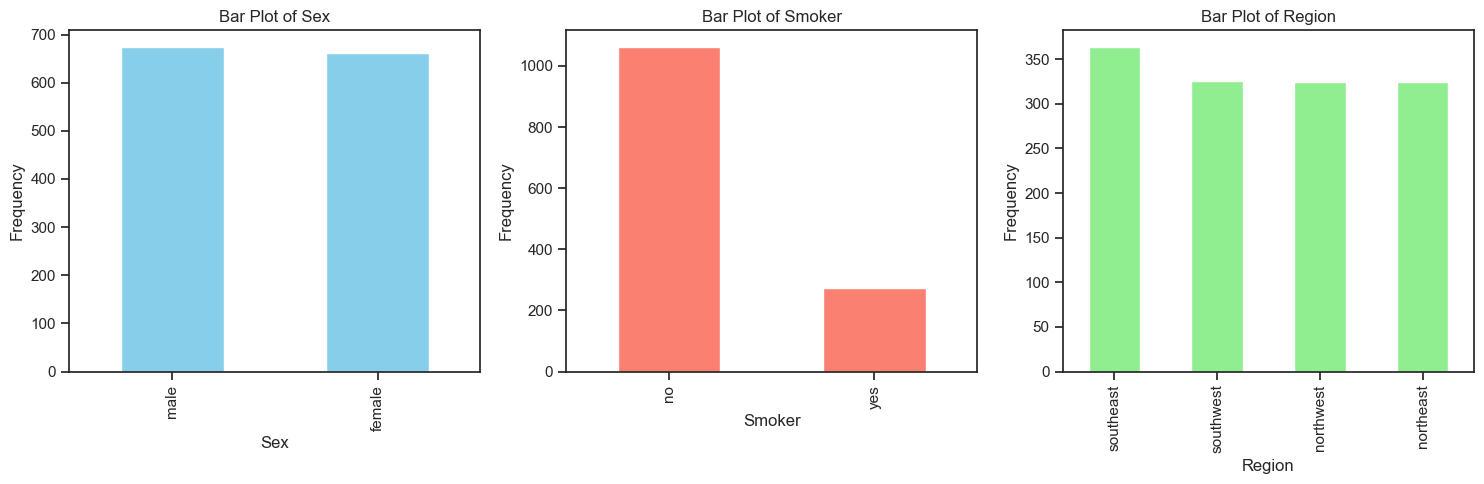

In [21]:
import pandas as pd
import matplotlib.pyplot as plt



# Crear un subplot para los gráficos de barras de las variables categóricas
plt.figure(figsize=(15, 5))

# Gráfico de barras de 'sex'
plt.subplot(1, 3, 1)
df['sex'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Bar Plot of Sex')

# Gráfico de barras de 'smoker'
plt.subplot(1, 3, 2)
df['smoker'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.title('Bar Plot of Smoker')

# Gráfico de barras de 'region'
plt.subplot(1, 3, 3)
df['region'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Bar Plot of Region')

# Ajustar el espacio entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el subplot
plt.show()

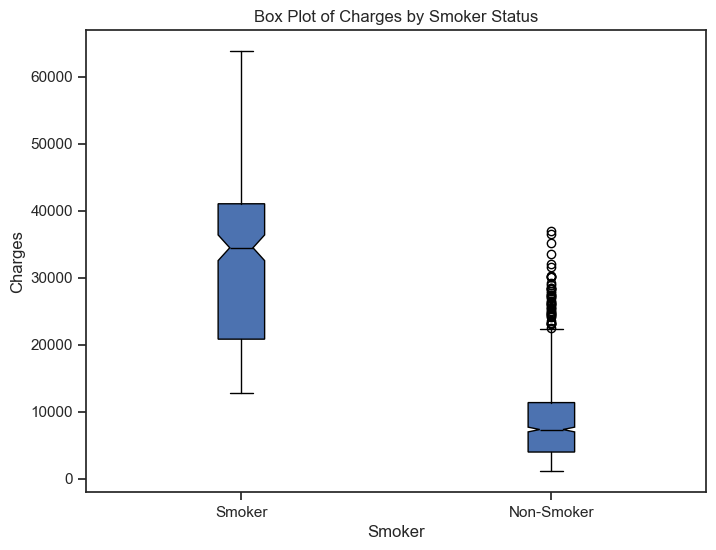

In [22]:


# Crear el gráfico de caja
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['smoker'] == 'yes']['charges'], df[df['smoker'] == 'no']['charges']],
            labels=['Smoker', 'Non-Smoker'], notch=True, patch_artist=True, medianprops=dict(color='black'))

plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Box Plot of Charges by Smoker Status')

# Mostrar el gráfico
plt.show()

In [24]:
# Contar no fumadores con cargos entre 20000 y 40000
df_nosmoke = df[df['smoker'] == 'no']
#print (df_nosmoke)

# Contar cuántos pagan más de 20000 en charges en df_nosmoke
count_over_20000 = df_nosmoke[df_nosmoke['charges'] >= 20000].shape[0]

print(f"El número de no fumadores que pagan más de 20000 en charges es: {count_over_20000}")

El número de no fumadores que pagan más de 20000 en charges es: 61


In [11]:
# Contar no fumadores con cargos entre 20000 y 40000
df_smoke = df[df['smoker'] == 'yes']
#print (df_nosmoke)

# Contar cuántos pagan más de 20000 en charges en df_nosmoke
count_over_20000 = df_smoke[df_smoke['charges'] >= 20000].shape[0]
print(count_over_20000)
print(f"El número de fumadores que pagan más de 20000 en charges es: {count_over_20000}")

212
El número de fumadores que pagan más de 20000 en charges es: 212


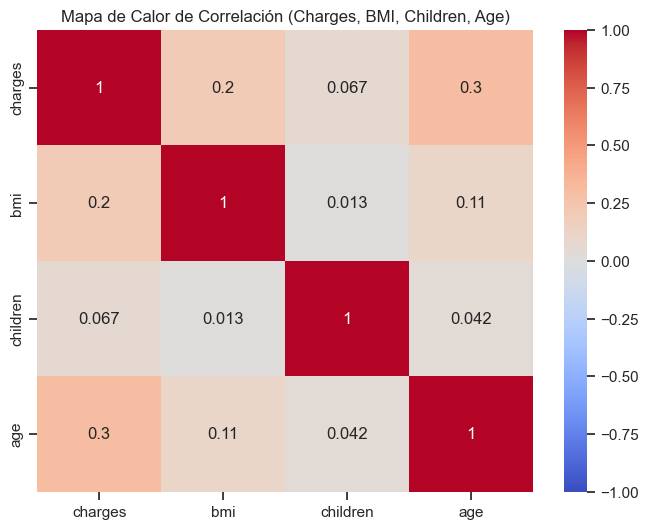

In [25]:
import seaborn as sns
# mapa de calor entre las variables numericas
df_selected = df[['charges', 'bmi', 'children', 'age']]

# Calcular la matriz de correlación entre las columnas seleccionadas
correlation_matrix = df_selected.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Añadir título
plt.title('Mapa de Calor de Correlación (Charges, BMI, Children, Age)')

# Mostrar el mapa de calor
plt.show()

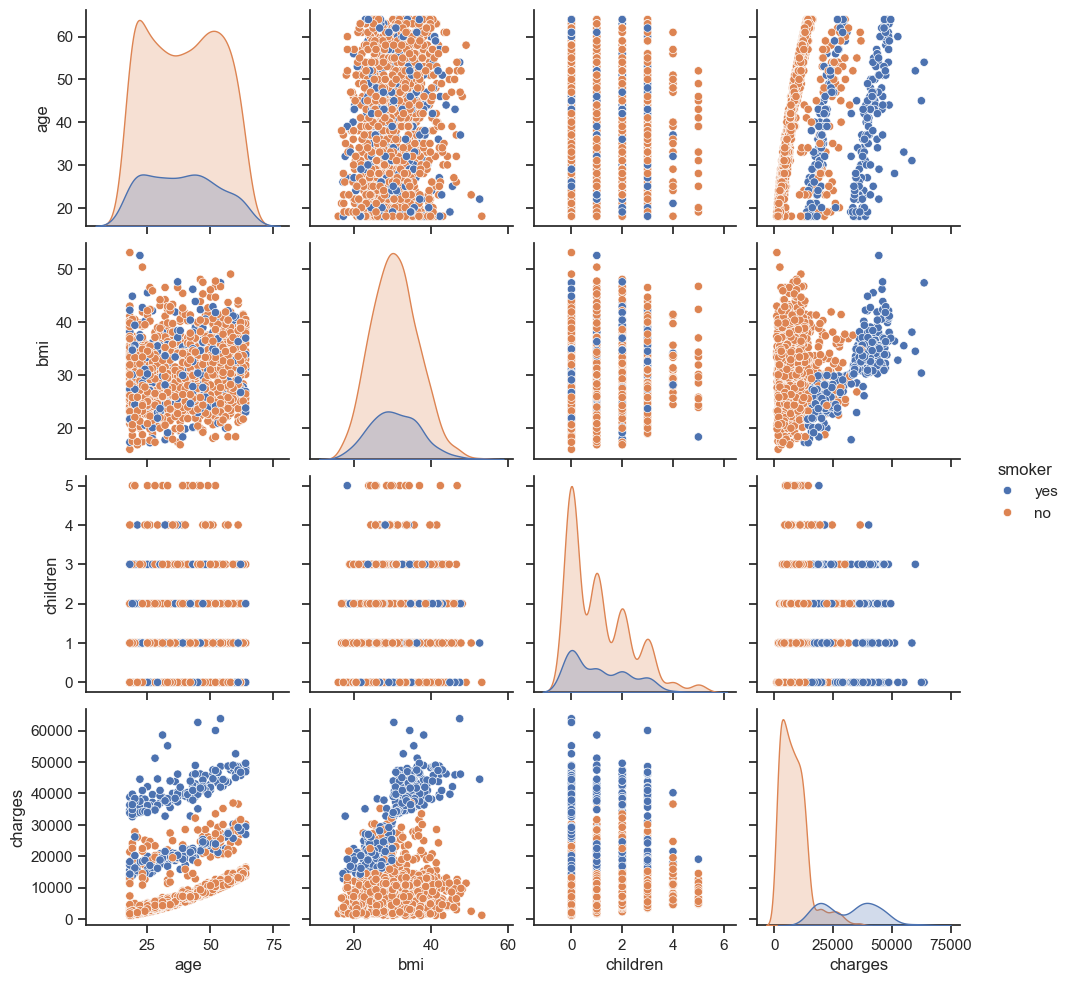

In [26]:

# Configurar el estilo de seaborn
sns.set(style="ticks", color_codes=True)

# Crear el pairplot
sns.pairplot(df, hue='smoker', diag_kind='auto')

# Mostrar el pairplot
plt.show()

In [27]:
# Contar cuántos smoker = yes tienen bmi >= 30 (obesidad)
count_smoker_yes_high_bmi = df[(df['smoker'] == 'yes') & (df['bmi'] >= 30)].shape[0]

print(f"Número de personas fumadoras con BMI >= 30 (obesidad): {count_smoker_yes_high_bmi}")

Número de personas fumadoras con BMI >= 30 (obesidad): 145


In [30]:
from sklearn.model_selection import train_test_split
# Codificar las variables categóricas usando factorize
df['region_factorized'], region_uniques = pd.factorize(df['region'])
df['sex_factorized'], sex_uniques = pd.factorize(df['sex'])
df['smoker_factorized'], smoker_uniques = pd.factorize(df['smoker'])

# Visualizar los primeros datos del DataFrame para verificar la codificación
print(df.head())

# Separar características y objetivo
X = df[['age', 'bmi', 'children', 'region_factorized', 'sex_factorized', 'smoker_factorized']]
y = df['charges']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

   region_factorized  sex_factorized  smoker_factorized  
0                  0               0                  0  
1                  1               1                  1  
2                  1               1                  1  
3                  2               1                  1  
4                  2               1                  1  


In [29]:
#dividimos datos entre train y test

from sklearn.model_selection import train_test_split



# Separar las características (X) y la variable objetivo (y)
X = df[['age', 'bmi', 'children', 'region_factorized', 'sex_factorized', 'smoker_factorized']] # Ejemplo: características numéricas
y = df['charges']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar dimensiones de los conjuntos de datos
print(f'Dimensiones de X_train: {X_train.shape}')
print(f'Dimensiones de X_test: {X_test.shape}')
print(f'Dimensiones de y_train: {y_train.shape}')
print(f'Dimensiones de y_test: {y_test.shape}')


Dimensiones de X_train: (935, 6)
Dimensiones de X_test: (402, 6)
Dimensiones de y_train: (935,)
Dimensiones de y_test: (402,)


In [31]:
# cargamos librerias para iniciar modelo de regrecion lineal
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [32]:
#entrenamos modelo de regresion lineal
# Crear un objeto de regresión lineal
model = LinearRegression()

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

In [33]:
# Hacer predicciones utilizando los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2:.2f}')


Error Cuadrático Medio (MSE): 35493102.61
Coeficiente de Determinación (R^2): 0.81


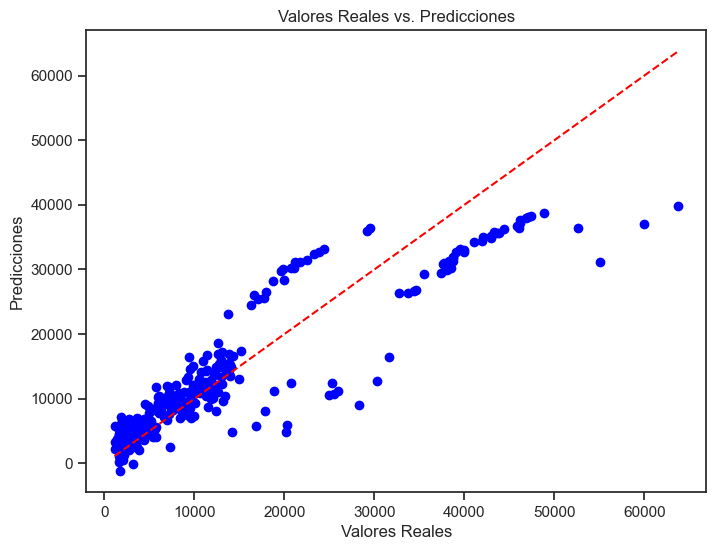

In [34]:
# Gráfico de dispersión para visualizar las predicciones vs. valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()


In [35]:
#intentamos mejorar el modelo y el r2 con un modelo de polinomios
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Ejemplo: Regresión polinómica de grado 2
poly_model = make_pipeline(PolynomialFeatures(degree=2),
                           LinearRegression())

# Entrenar el modelo
poly_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = poly_model.predict(X_test)

# Calcular el R^2
r2 = r2_score(y_test, y_pred)
print(f'R^2 después de la regresión polinómica: {r2:.2f}')


R^2 después de la regresión polinómica: 0.87


In [36]:
from sklearn.ensemble import RandomForestRegressor

# Crear un modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Calcular el R^2
r2_rf = r2_score(y_test, y_pred_rf)
print(f'R^2 con Random Forest: {r2_rf:.2f}')


R^2 con Random Forest: 0.88


In [37]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear un modelo de Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_gb = gb_model.predict(X_test)

# Calcular el R^2
r2_gb = r2_score(y_test, y_pred_gb)
print(f'R^2 con Gradient Boosting: {r2_gb:.2f}')


R^2 con Gradient Boosting: 0.90


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Crear un modelo de Regresión Lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular el R^2
r2 = r2_score(y_test, y_pred)
print(f'R^2 con Regresión Lineal: {r2:.2f}')


R^2 con Regresión Lineal: 0.81


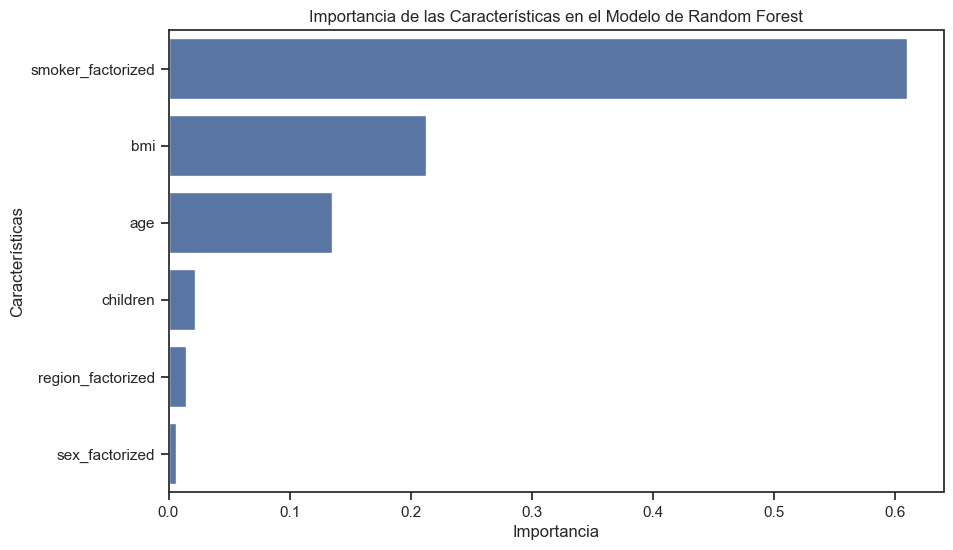

In [41]:
#graficamos la importancia de caractristicas, este grafico nos dice 
#cual es la caracteristica mas importante para la prediccion


feature_importances = rf_model.feature_importances_

# Crear un DataFrame con la importancia de las características
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características en el Modelo de Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


Interpretación de los Resultados del Modelo de Gradient Boosting

Precisión del Modelo:

Un resultado del (0.90) indica que el modelo de Gradient Boosting está explicando el 90% de la variabilidad en el costo de los seguros médicos (charges). Esto es un muy buen indicador de que el modelo es robusto y sus predicciones son fiables.

Importancia de las Características:
  

Para entender mejor el modelo, es importante ver cuáles características están contribuyendo más a esta precisión. Esto se puede hacer visualizando la importancia de las características.
Visualización de la Importancia de las Características:

La importancia de las características muestra cuánto está contribuyendo cada característica en la predicción de la variable objetivo (charges).

¿habria forma de aumentar la eficacia del modelo? quiza si tubiesemos mas datos como por ejemplo:
        - Consumo de Alcohol 
        - Consumo de Drogas
        - Algun Familiar que haya sufrido cancer?
        - Algun familiar que haya sufrido diabetes ?
        - El cliente realiza grandes desplazamientos para ir al trabajo diariamente?
        - se ha realizado alguna intervencion quirurgica de importancia (ejemplos)?
